# Cointegration Model

 The focus for cointegration is whether the distance between two time series, called the spread, remains constant over time. We will use the Augmented Dickey-Fuller Test of the spread to make that determination. 

## Stationary Series with Cointegration

### Corn and Wheat

In [1]:
# https://fred.stlouisfed.org/series/WPU012202
# Producer Price Index by Commodity for Farm Products: Corn, Producer Price Index 1982=100, not seasonally adjusted
# 1971-01-01 to 2019-09-01

# https://fred.stlouisfed.org/series/WPU0121
# Producer Price Index by Commodity for Farm Products: Wheat, Producer Price Index 1982 = 100, not seasonally adjusted
# 1971-01-01 to 2019-09-01

import pandas as pd
import matplotlib.pyplot as plot

In [3]:
# Read in dataset
corn = pd.read_csv("Corn.csv", index_col=0, parse_dates=True)
wheat = pd.read_csv("Wheat.csv",index_col=0, parse_dates=True)

In [4]:
# Replace column name 'WPU012202'
column_name = ['PP Index 1982']
corn.columns = column_name
corn.head()

,PP Index 1982
DATE,
1971-01-01,63.4
1971-02-01,63.6
1971-03-01,62.0
1971-04-01,60.8
1971-05-01,60.2


In [5]:
# Replace column name 'WPU0121'
column_name = ['PP Index 1982']
wheat.columns = column_name
wheat.head()

,PP Index 1982
DATE,
1971-01-01,42.6
1971-02-01,42.6
1971-03-01,41.4
1971-04-01,41.7
1971-05-01,41.8


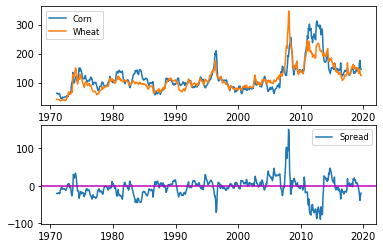

In [5]:
# Plot the prices separately
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.subplot(2,1,1)
plt.plot(corn['PP Index 1982'], label='Corn')
plt.plot(wheat['PP Index 1982'], label='Wheat')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(wheat['PP Index 1982'] - corn['PP Index 1982'], label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='-', color='m')
plt.show()

In [6]:

# The argument for adfuller must be a series, so you need to include the column 'PP Index 1982'

# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for corn and wheat
result_corn = adfuller(corn['PP Index 1982'])
print("The p-value for the ADF test on corn is ", result_corn[1])
result_wheat = adfuller(wheat['PP Index 1982'])
print("The p-value for the ADF test on wheat is ", result_wheat[1])

# Compute the ADF of the spread
result_spread = adfuller(wheat['PP Index 1982'] - corn['PP Index 1982'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on corn is  0.013353821578888857
The p-value for the ADF test on wheat is  0.023846697466192255
The p-value for the ADF test on the spread is  0.0004206101037195748


From the AD Fuller tests for each series, the null hypothesis can be rejected for non-stationarity.  These two series must be stationary.

For the AD Fuller test of the spread between the two series, it is also stationary, given p-value of roughly 0.00. Hence, the two series are cointegrated. This means that the spread has constant mean throughout time.

 The p-value for the spread is very close to 0.05 but it does not surpass the cutoff of 0.05. We say that the spread is stationary as well, hence the two series are cointegrated.

## Non-Stationary Series with Cointegration

### Search Terms for "flour" and "gluten free"

In [14]:
#  https://trends.google.com/trends/explore?date=2013-09-11%202019-10-11&geo=US&q=flour,gluten%20free
# Google search terms for the words "flour" and "gluten free"
# Period is 9/11/13 to 10/11/2019
# Data reflect the number of times the words were google searched per month

import pandas as pd
import matplotlib.pyplot as plot
df = pd.read_csv("/Users/karenyang/Desktop/section_5/flour.csv", skiprows=1)
df.head()

,Month,flour: (United States),gluten free: (United States)
0,2013-10,46,88
1,2013-11,55,100
2,2013-12,54,92
3,2014-01,55,93
4,2014-02,51,89


In [15]:
# Rename columns
col_names = ['Month','flour', 'gluten_free']
df.columns = col_names

In [16]:
from datetime import datetime

# Convert the date index to datetime
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)

In [17]:
# Set the 'Date' as index
df.set_index('Month', inplace=True)

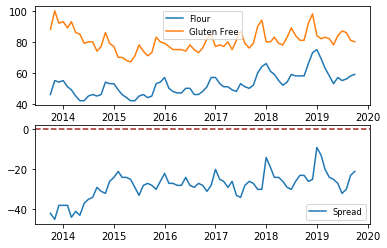

In [18]:
# Plot separately the search terms
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(df['flour'], label='Flour')
plt.plot(df['gluten_free'], label='Gluten Free')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(df['flour'] - df['gluten_free'], label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='brown')
plt.show()


In [19]:
# Perform the adfuller test on flour and on gluten free separately, 
# and save the results (results are a list)

# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for flour and gluten_free
result_flour = adfuller(df['flour'])
print("The p-value for the ADF test on flour is ", result_flour[1])
result_glutenfree = adfuller(df['gluten_free'])
print("The p-value for the ADF test on gluten-free is ", result_glutenfree[1])

# Compute the ADF of the spread
result_spread = adfuller(df['flour'] - df['gluten_free'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on flour is  0.9765218098980625
The p-value for the ADF test on gluten-free is  0.4705661180798901
The p-value for the ADF test on the spread is  0.03775586281135462


Both the p-values for the individual series exceed the 0.05 statistical significance level.  We, therefore cannot reject the null hypothesis.  The two series must be non-stationary.  When we look at the spread between the two series, that series has a p-value of under 0.05.  We can reject the null hypothesis of non-stationary. The series for the spread between flour and gluten free must be stationary.  Therefore, the two series are cointegrated.

This is an interesting case where you can see two non-stationary series but they have a spread that is stationary.

## Non-Stationary Series and No Cointegration

### Adjusted Closing Price for Spotify and Netflix

In [8]:
df = pd.read_csv('SpotifyNetflix.csv')

In [9]:
df.head()

,Date,NFLX,SPOT
0,2018-07-02,398.179993,170.690002
1,2018-07-03,390.519989,168.660004
2,2018-07-05,398.390015,176.440002
3,2018-07-06,408.250000,175.699997
4,2018-07-09,418.970001,177.440002


In [10]:
from datetime import datetime
# Convert the date index to datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [11]:
df.set_index('Date', inplace=True)

In [12]:
df.head()

,NFLX,SPOT
Date,,
2018-07-02,398.179993,170.690002
2018-07-03,390.519989,168.660004
2018-07-05,398.390015,176.440002
2018-07-06,408.250000,175.699997
2018-07-09,418.970001,177.440002


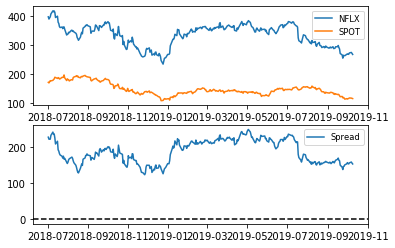

In [13]:
# Plot the prices separately
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.plot(df['NFLX'], label='NFLX')
plt.plot(df['SPOT'], label='SPOT')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(df['NFLX'] - df['SPOT'], label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [14]:
# Perform the adfuller test separately
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF on each series
result_nflx = adfuller(df['NFLX'])
print("The p-value for the ADF test on Netflix is ", result_nflx[1])
result_spot = adfuller(df['SPOT'])
print("The p-value for the ADF test on Spotify is ", result_spot[1])

# Compute the ADF of the spread
result_spread = adfuller(df['NFLX'] - df['SPOT'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on Netflix is  0.30171112920549814
The p-value for the ADF test on Spotify is  0.6506418144855738
The p-value for the ADF test on the spread is  0.23088640313994319


You can see that there is no statistical significance for the p-values.  The null hypothesis cannot be rejected.  Both series are non-stationary. The spread between the two is also non-stationary. There is no stationarity and no cointegration.